In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc

In [2]:
font = {'size'   : 16}
rc('font', **font)

In [3]:
fname = 'logs/gridsearch011223.txt'
nSamples = [20, 30, 40, 50, 60]
fastConst = [5, 10, 15, 20]
nAllPairs = [0, 10, 20, 30]

In [4]:
slowAcc = np.zeros((len(nSamples), len(fastConst), len(nAllPairs)))
fastAcc = np.zeros((len(nSamples), len(fastConst), len(nAllPairs)))
slowOps = np.zeros((len(nSamples), len(fastConst), len(nAllPairs)))
fastOps = np.zeros((len(nSamples), len(fastConst), len(nAllPairs)))
with open(fname, 'r') as f:
  lines = f.readlines()
  idx = None
  for line in lines:
    lineArr = line.strip().replace(',', '').split(' ')
    if line[:2] == 'S ':
      idx = (nSamples.index(int(lineArr[1])),
             fastConst.index(int(lineArr[3])),
             nAllPairs.index(int(lineArr[5])))
      val = [-1, -1, -1, -1]
    elif line[:4] == 'Slow':
      slowAcc[idx] = float(lineArr[2])
      slowOps[idx] = float(lineArr[4])
    elif line[:4] == 'Fast':
      fastAcc[idx] = float(lineArr[2])
      fastOps[idx] = float(lineArr[4])

In [5]:
slowAcc = slowAcc/20
fastAcc = fastAcc/20
slowOps = slowOps/20
fastOps = fastOps/20

In [6]:
def envelope_plot(x, y, color='b', label='None', marker='.'):
  n = len(x)
  assert(n == len(y))
  sortID = np.flip(np.argsort(y))
  minX = 1e10
  x = x[sortID]
  y = y[sortID]
  goodIDs = []
  badIDs = []
  for i in range(n):
    if x[i] < minX - 100:
      goodIDs.append(i)
      minX = x[i]
    else:
      badIDs.append(i)
  plt.scatter(x[goodIDs], y[goodIDs], color=color, alpha=0.9, label=label, marker=marker, s=50)
  plt.scatter(x[badIDs], y[badIDs], color=color, alpha=0.1, marker=marker, s=50)
  
def plot(s):
  fig = plt.figure(figsize=(8,6))
  ax = fig.get_axes()
  envelope_plot(slowOps[:s+1,:,:].flatten(), slowAcc[:s+1,:,:].flatten(), color='blue', label='Tournament', marker='^')
  envelope_plot(fastOps[:s+1,:,:].flatten(), fastAcc[:s+1,:,:].flatten(), color='green', label='FastTournament', marker='o')
  plt.xlabel('Number of Operations')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.title('Samples: {}'.format(nSamples[s]))
  if s == 0:
    plt.ticklabel_format(axis='x', scilimits=(6,6))
  plt.tight_layout()
  plt.savefig('plots/accops_{}.jpg'.format(nSamples[s]), dpi=300)
#   plt.ylim(0.5, 1.0)
#   plt.xlim(0, 2e6)

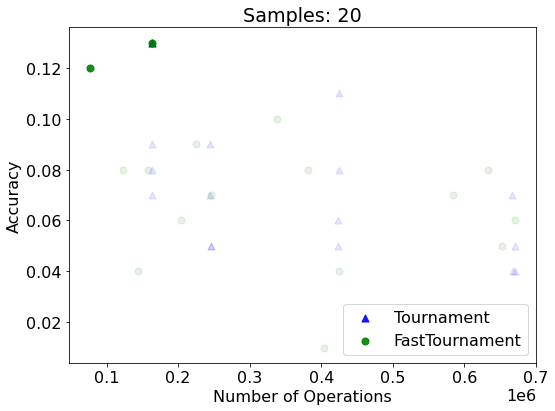

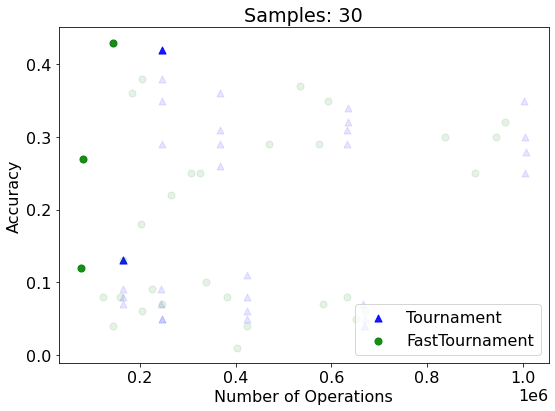

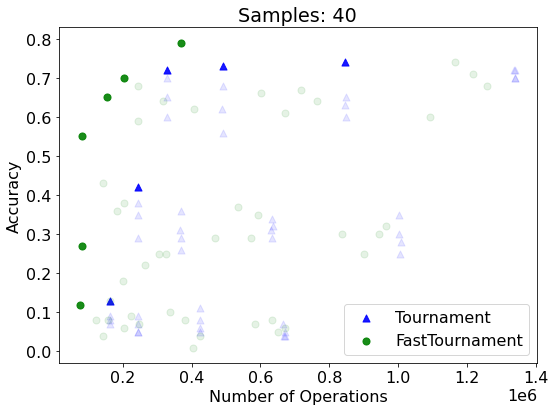

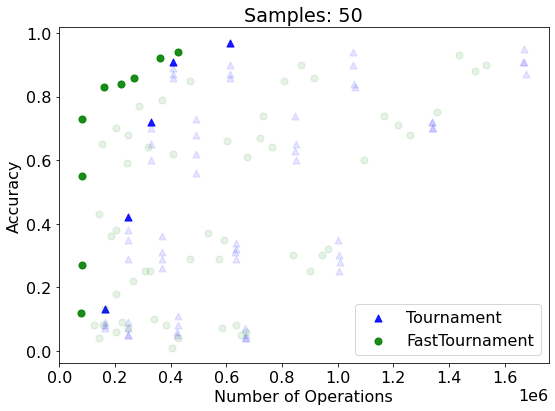

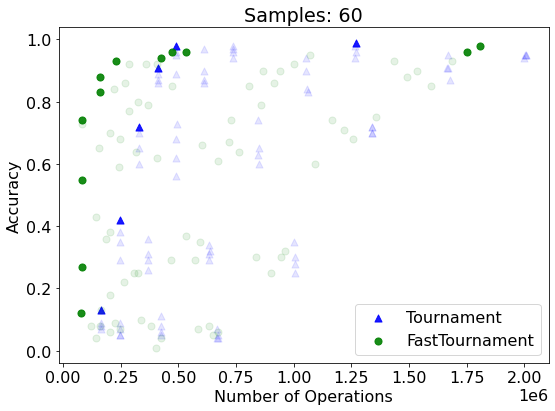

In [7]:
plot(0)
plot(1)
plot(2)
plot(3)
plot(4)

(0.0, 500000.0)

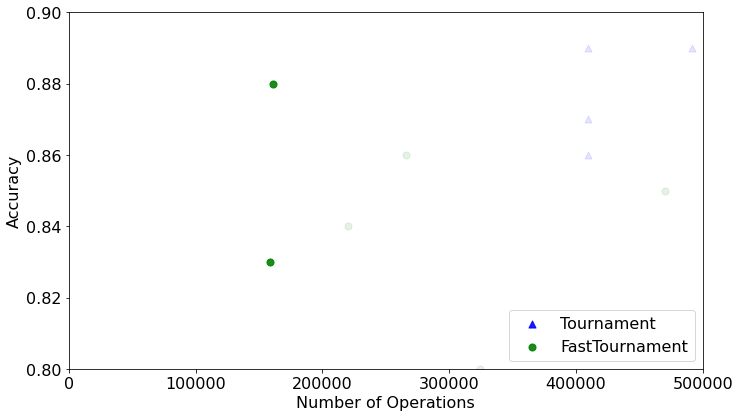

In [8]:
plt.figure(figsize=(10,6))
envelope_plot(slowOps.flatten(), slowAcc.flatten(), color='blue', label='Tournament', marker='^')
envelope_plot(fastOps.flatten(), fastAcc.flatten(), color='green', label='FastTournament', marker='o')
plt.xlabel('Number of Operations')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.ylim(0.8, .9)
plt.xlim(0e5, 5e5)

In [9]:
print(np.max(fastAcc[0]))
print(np.max(fastAcc))
print(np.max(slowAcc[0]))
print(np.max(slowAcc))

0.13
0.9800000000000001
0.13
0.99


In [10]:
print(fastAcc[-1])

[[0.74 0.8  0.79 0.85]
 [0.88 0.92 0.9  0.93]
 [0.93 0.96 0.92 0.96]
 [0.92 0.96 0.95 0.98]]


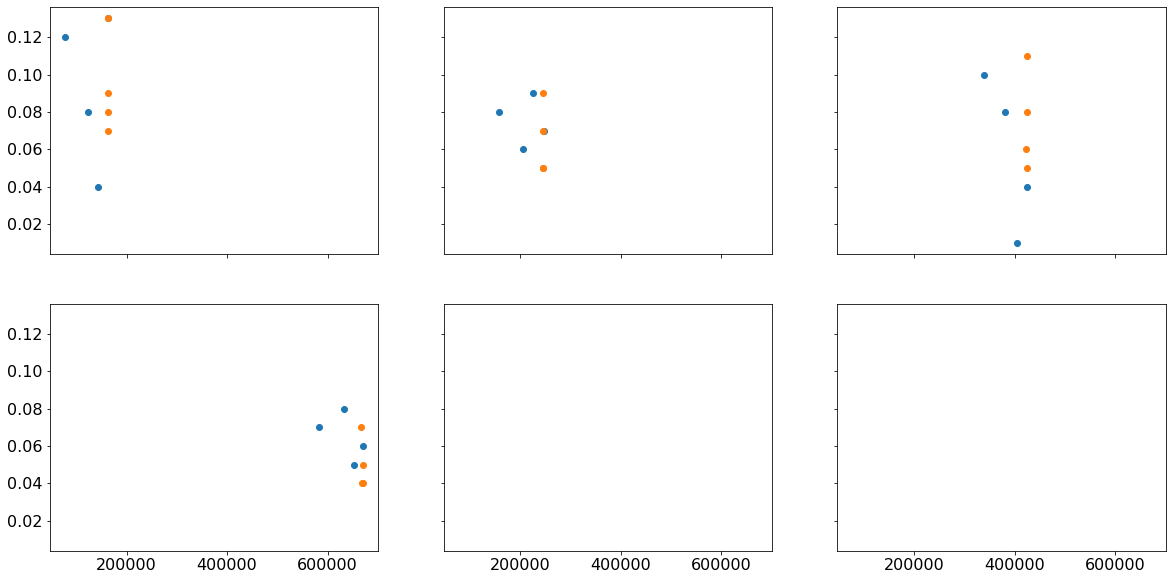

In [11]:
fig, axes = plt.subplots(2,3,figsize=(20,10),sharex=True,sharey=True)
for i in range(len(nAllPairs)):
  ax0 = int(i >= 3)
  ax1 = i % 3
  axes[ax0, ax1].scatter(fastOps[0,:,i], fastAcc[0,:,i])
  axes[ax0, ax1].scatter(slowOps[0,:,i], slowAcc[0,:,i])
# axes[0,0].set_ylim(0.6,.96)